## Dataset

In [ ]:
import tensorflow as tf
import os

data_zip = tf.keras.utils.get_file('dataset.zip',
                                        extract=True,
                                        cache_subdir=os.path.abspath('.'),
                                        # origin="https://people.eecs.berkeley.edu/~taesung_park/CycleGAN/datasets/apple2orange.zip")
                                        # origin='https://people.eecs.berkeley.edu/~taesung_park/CycleGAN/datasets/horse2zebra.zip')
                                        origin='https://people.eecs.berkeley.edu/~taesung_park/CycleGAN/datasets/vangogh2photo.zip')


In [ ]:
os.mkdir('./output')
os.mkdir('./models')

## Build model

In [1]:
from model import CycleGAN

gan = CycleGAN(mode='train', base='resnet', verbose=False)
gan.build()
gan.compile(learning_rate=2e-4)

Using TensorFlow backend.


## Training

In [ ]:
gan.train('../dataset/summer2winter_yosemite/trainA/*.jpg', '../dataset/summer2winter_yosemite/trainB/*.jpg', epochs=200, decay_from=100, 
          steps_per_epoch=1000, batch_size=1, image_save_path='../output/20190314/', model_save_path='../models/20190314/',
          save_image_every_step=100, save_model_every_epoch=1,
          show_image=True, load_model=False, model_load_path='../models/20190314/')

## Test

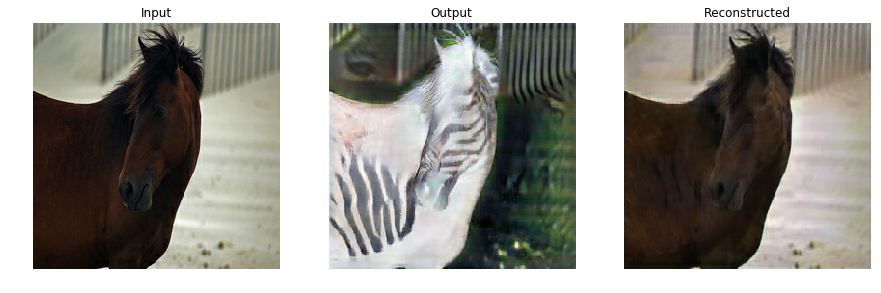

[Image 101] time: 0.3714148998260498
[Image 102] time: 0.09754514694213867
[Image 103] time: 0.0931251049041748
[Image 104] time: 0.10285520553588867
[Image 105] time: 0.10671162605285645
[Image 106] time: 0.09962654113769531
[Image 107] time: 0.09361529350280762
[Image 108] time: 0.08544516563415527
[Image 109] time: 0.10284614562988281
[Image 110] time: 0.09948515892028809
[Image 111] time: 0.1099405288696289
[Image 112] time: 0.10562372207641602
[Image 113] time: 0.0988011360168457
[Image 114] time: 0.10039329528808594
[Image 115] time: 0.08472514152526855
[Image 116] time: 0.08818721771240234
[Image 117] time: 0.08546757698059082
[Image 118] time: 0.08458185195922852
[Image 119] time: 0.08855915069580078
[Image 120] time: 0.09506821632385254
Test completed.


In [2]:
gan.test('../dataset/horse2zebra/testA/*.jpg', '../models/20190313/model-gan.h5', is_a2b=True,
         batch_size=1, image_save_path='../output/horse2zebra/testA/', show_image=True, show_image_every_step=50)

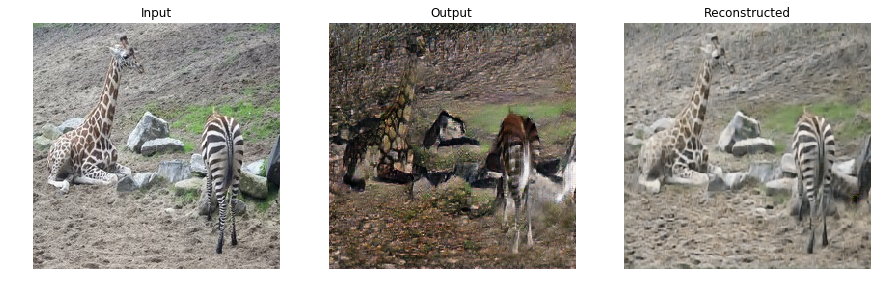

[Image 101] time: 0.30176711082458496
[Image 102] time: 0.10539698600769043
[Image 103] time: 0.09807014465332031
[Image 104] time: 0.10259127616882324
[Image 105] time: 0.09587311744689941
[Image 106] time: 0.09940719604492188
[Image 107] time: 0.0981442928314209
[Image 108] time: 0.08701419830322266
[Image 109] time: 0.10157990455627441
[Image 110] time: 0.09689712524414062
[Image 111] time: 0.08665275573730469
[Image 112] time: 0.10078930854797363
[Image 113] time: 0.09196162223815918
[Image 114] time: 0.08440804481506348
[Image 115] time: 0.08657312393188477
[Image 116] time: 0.08651161193847656
[Image 117] time: 0.08610987663269043
[Image 118] time: 0.08943367004394531
[Image 119] time: 0.08577895164489746
[Image 120] time: 0.08855009078979492
[Image 121] time: 0.08917427062988281
[Image 122] time: 0.09346795082092285
[Image 123] time: 0.09336256980895996
[Image 124] time: 0.09971904754638672
[Image 125] time: 0.09132671356201172
[Image 126] time: 0.09595775604248047
[Image 127] t

In [3]:
gan.test('../dataset/horse2zebra/testB/*.jpg', '../models/20190313/model-gan.h5', is_a2b=False,
         batch_size=1, image_save_path='../output/horse2zebra/testB/', show_image=True, show_image_every_step=50)

## Save model to Google cloud

In [ ]:
# Install the PyDrive wrapper & import libraries.
# This only needs to be done once in a notebook.
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# This only needs to be done once in a notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# Create & upload a file.
uploaded = drive.CreateFile({'title': 'model-disc-a.h5'})
uploaded.SetContentFile('./models/model-disc-a.h5')
uploaded.Upload()
print('Uploaded file with ID {}'.format(uploaded.get('id')))

uploaded = drive.CreateFile({'title': 'model-disc-b.h5'})
uploaded.SetContentFile('./models/model-disc-b.h5')
uploaded.Upload()
print('Uploaded file with ID {}'.format(uploaded.get('id')))

uploaded = drive.CreateFile({'title': 'model-gan.h5'})
uploaded.SetContentFile('./models/model-gan.h5')
uploaded.Upload()
print('Uploaded file with ID {}'.format(uploaded.get('id')))

## Get model from Google cloud

In [ ]:
# Install the PyDrive wrapper & import libraries.
# This only needs to be done once per notebook.
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# This only needs to be done once per notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# Download a file based on its file ID.
#
# A file ID looks like: laggVyWshwcyP6kEI-y_W3P8D26sz
# os.makedirs('./logo_checkpoints/')
file_id = '1-GwlVFw_pYxEq_v61k-OngKvQu6iRMY3'
downloaded = drive.CreateFile({'id': file_id})
downloaded.GetContentFile('./models/model-disc-a.h5')
file_id = '1lkUiUNrLW9BofTAVb70iSfjNH4KYkfWM'
downloaded = drive.CreateFile({'id': file_id})
downloaded.GetContentFile('./models/model-disc-b.h5')
file_id = '1GXXUxSmfYJVZ047hqU52HQt8lXDW5iC3'
downloaded = drive.CreateFile({'id': file_id})
downloaded.GetContentFile('./models/model-gan.h5')
# print('Downloaded content "{}"'.format(downloaded.GetContentString()))